In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
import csv
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import pylab as pl
from sklearn import linear_model

In [9]:
df1=pd.read_csv(r"C:\Users\Lenovo\Desktop\cs5228\project\重改数据\train_final_complete.csv")
df2=pd.read_csv(r"C:\Users\Lenovo\Desktop\cs5228\project\重改数据\test_final_complete_cleaned.csv")

In [10]:
X_train_2 = df1.loc[:, ["built_year","num_beds","num_beds","lat","lng","property_type_ordinal","tenure_group","name_of_nearest_IHL_ordinal","name_of_nearest_BN_ordinal","name_of_nearest_CR_ordinal","dist_to_nearest_important_mrt_rounded","number_of_nearby_shopping_malls","number_of_nearby_primary_schools","number_of_nearby_secondary_schools","subzone_per_price_encoded","size_sqft"]]
X_train_size=df1.loc[:,["size_sqft"]]
y_train = df1.loc[:,["per_price"]]
y_train_price=df1.loc[:,["price"]]
X_test_2 = df2.loc[:, ["built_year","num_beds","num_beds","lat","lng","property_type_ordinal","tenure_group","name_of_nearest_IHL_ordinal","name_of_nearest_BN_ordinal","name_of_nearest_CR_ordinal","dist_to_nearest_important_mrt_rounded","number_of_nearby_shopping_malls","number_of_nearby_primary_schools","number_of_nearby_secondary_schools","subzone_per_price_encoded","size_sqft"]]
X_test_size=df2.loc[:,["size_sqft"]]

In [11]:
scaler = StandardScaler()
scaler.fit(X_train_2)
X_train_2 = scaler.transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

In [5]:
#linear
linear=linear_model.LinearRegression()
linear.fit(X_train_2,y_train)
y_pred_linear = linear.predict(X_test_2) 
ans_linear=X_test_size*y_pred_linear
df3_linear= pd.DataFrame(ans_linear)

In [6]:
#knn 
#choose n
loss=[]
for k in range(2,20):
    clf1 = KNeighborsRegressor(n_neighbors=k,weights="distance", algorithm="kd_tree",p=2, metric="minkowski")
    clf1.fit(X_train_2,y_train)
    y_pred_train_1 = clf1.predict(X_train_2)
    losse=0
    for i in range(len(y_train)):
        losse = losse+(y_pred_train_1[i][0]-y_train["per_price"][i])**2
    loss.append(losse)

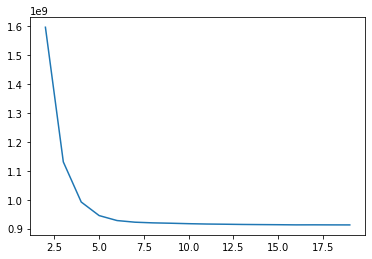

In [7]:
num1=[i for i in range(2,20)]
plt.plot(num1,loss)

In [12]:
#choose n=5
clf1 = KNeighborsRegressor(n_neighbors=5,weights="distance", algorithm="kd_tree",p=2, metric="minkowski")
clf1.fit(X_train_2,y_train)
y_pred_test_2 = clf1.predict(X_test_2)
ans_knn2=X_test_size*y_pred_test_2
df3= pd.DataFrame(ans_knn2)

In [14]:
#EDA linear model outcome on different price range
df_group1=df1[df1["per_price"]<=600]
X_train_g1 = df_group1.loc[:, ["built_year","num_beds","num_beds","lat","lng","property_type_ordinal","tenure_group","name_of_nearest_IHL_ordinal","name_of_nearest_BN_ordinal","name_of_nearest_CR_ordinal","dist_to_nearest_important_mrt_rounded","number_of_nearby_shopping_malls","number_of_nearby_primary_schools","number_of_nearby_secondary_schools","subzone_per_price_encoded","size_sqft"]]
y_train_g1 = df_group1.loc[:,["per_price"]]
X_train_g1_size = df_group1.loc[:,["size_sqft"]]
y_train_g1_price = df_group1.loc[:,["price"]]
df_group2=df1[(df1["per_price"]>600) & (df1["per_price"]<=1200)]
X_train_g2 = df_group2.loc[:, ["built_year","num_beds","num_beds","lat","lng","property_type_ordinal","tenure_group","name_of_nearest_IHL_ordinal","name_of_nearest_BN_ordinal","name_of_nearest_CR_ordinal","dist_to_nearest_important_mrt_rounded","number_of_nearby_shopping_malls","number_of_nearby_primary_schools","number_of_nearby_secondary_schools","subzone_per_price_encoded","size_sqft"]]
y_train_g2 = df_group2.loc[:,["per_price"]]
X_train_g2_size = df_group2.loc[:,["size_sqft"]]
y_train_g2_price = df_group2.loc[:,["price"]]
df_group3=df1[(1200< df1["per_price"]) & (df1["per_price"]<=1800)]
X_train_g3 = df_group3.loc[:, ["built_year","num_beds","num_beds","lat","lng","property_type_ordinal","tenure_group","name_of_nearest_IHL_ordinal","name_of_nearest_BN_ordinal","name_of_nearest_CR_ordinal","dist_to_nearest_important_mrt_rounded","number_of_nearby_shopping_malls","number_of_nearby_primary_schools","number_of_nearby_secondary_schools","subzone_per_price_encoded","size_sqft"]]
y_train_g3 = df_group3.loc[:,["per_price"]]
X_train_g3_size = df_group3.loc[:,["size_sqft"]]
y_train_g3_price = df_group3.loc[:,["price"]]
df_group4=df1[(1800< df1["per_price"]) & (df1["per_price"]<=2400)]
X_train_g4 = df_group4.loc[:, ["built_year","num_beds","num_beds","lat","lng","property_type_ordinal","tenure_group","name_of_nearest_IHL_ordinal","name_of_nearest_BN_ordinal","name_of_nearest_CR_ordinal","dist_to_nearest_important_mrt_rounded","number_of_nearby_shopping_malls","number_of_nearby_primary_schools","number_of_nearby_secondary_schools","subzone_per_price_encoded","size_sqft"]]
y_train_g4 = df_group4.loc[:,["per_price"]]
X_train_g4_size = df_group4.loc[:,["size_sqft"]]
y_train_g4_price = df_group4.loc[:,["price"]]
df_group5=df1[(2400< df1["per_price"]) & (df1["per_price"]<=3000)]
X_train_g5 = df_group5.loc[:, ["built_year","num_beds","num_beds","lat","lng","property_type_ordinal","tenure_group","name_of_nearest_IHL_ordinal","name_of_nearest_BN_ordinal","name_of_nearest_CR_ordinal","dist_to_nearest_important_mrt_rounded","number_of_nearby_shopping_malls","number_of_nearby_primary_schools","number_of_nearby_secondary_schools","subzone_per_price_encoded","size_sqft"]]
y_train_g5 = df_group5.loc[:,["per_price"]]
X_train_g5_size = df_group5.loc[:,["size_sqft"]]
y_train_g5_price = df_group5.loc[:,["price"]]
df_group6=df1[df1["per_price"]> 3000]
X_train_g6 = df_group6.loc[:, ["built_year","num_beds","num_beds","lat","lng","property_type_ordinal","tenure_group","name_of_nearest_IHL_ordinal","name_of_nearest_BN_ordinal","name_of_nearest_CR_ordinal","dist_to_nearest_important_mrt_rounded","number_of_nearby_shopping_malls","number_of_nearby_primary_schools","number_of_nearby_secondary_schools","subzone_per_price_encoded","size_sqft"]]
y_train_g6 = df_group6.loc[:,["per_price"]]
X_train_g6_size = df_group6.loc[:,["size_sqft"]]
y_train_g6_price = df_group6.loc[:,["price"]]
X_train_g1=scaler.transform(X_train_g1)
X_train_g2=scaler.transform(X_train_g2)
X_train_g3=scaler.transform(X_train_g3)
X_train_g4=scaler.transform(X_train_g4)
X_train_g5=scaler.transform(X_train_g5)
X_train_g6=scaler.transform(X_train_g6)

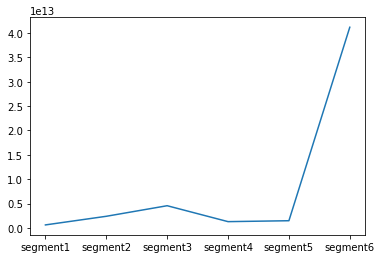

In [16]:
y_pred_linear_1 = linear.predict(X_train_g1)
loss1=np.mean(np.square(y_pred_linear_1.T[0]*X_train_g1_size["size_sqft"].to_numpy()-y_train_g1_price["price"].to_numpy()))
y_pred_linear_2 = linear.predict(X_train_g2)
loss2=np.mean(np.square(y_pred_linear_2.T[0]*X_train_g2_size["size_sqft"].to_numpy()-y_train_g2_price["price"].to_numpy()))
y_pred_linear_3 = linear.predict(X_train_g3)
loss3=np.mean(np.square(y_pred_linear_3.T[0]*X_train_g3_size["size_sqft"].to_numpy()-y_train_g3_price["price"].to_numpy()))
y_pred_linear_4 = linear.predict(X_train_g4)
loss4=np.mean(np.square(y_pred_linear_4.T[0]*X_train_g4_size["size_sqft"].to_numpy()-y_train_g4_price["price"].to_numpy()))
y_pred_linear_5 = linear.predict(X_train_g5)
loss5=np.mean(np.square(y_pred_linear_5.T[0]*X_train_g5_size["size_sqft"].to_numpy()-y_train_g5_price["price"].to_numpy()))
y_pred_linear_6 = linear.predict(X_train_g6)
loss6=np.mean(np.square(y_pred_linear_6.T[0]*X_train_g6_size["size_sqft"].to_numpy()-y_train_g6_price["price"].to_numpy()))
loss=[loss1,loss2,loss3,loss4,loss5,loss6]
segment=["segment1","segment2","segment3","segment4","segment5","segment6"]
plt.plot(segment,loss)

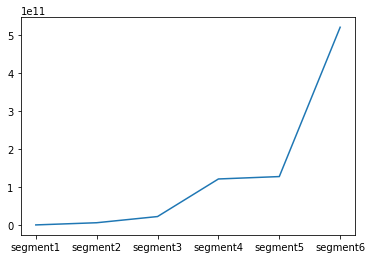

In [17]:
#EDA knn model outcome on different price range
y_pred_train_1 = clf1.predict(X_train_g1)
y_pred_train_2 = clf1.predict(X_train_g2)
y_pred_train_3 = clf1.predict(X_train_g3)
y_pred_train_4 = clf1.predict(X_train_g4)
y_pred_train_5 = clf1.predict(X_train_g5)
y_pred_train_6 = clf1.predict(X_train_g6)
y_pred_knn_1 = clf1.predict(X_train_g1)
loss1_knn=np.mean(np.square(y_pred_knn_1.T[0]*X_train_g1_size["size_sqft"].to_numpy()-y_train_g1_price["price"].to_numpy()))
y_pred_knn_2 = clf1.predict(X_train_g2)
loss2_knn=np.mean(np.square(y_pred_knn_2.T[0]*X_train_g2_size["size_sqft"].to_numpy()-y_train_g2_price["price"].to_numpy()))
y_pred_knn_3 = clf1.predict(X_train_g3)
loss3_knn=np.mean(np.square(y_pred_knn_3.T[0]*X_train_g3_size["size_sqft"].to_numpy()-y_train_g3_price["price"].to_numpy()))
y_pred_knn_4 = clf1.predict(X_train_g4)
loss4_knn=np.mean(np.square(y_pred_knn_4.T[0]*X_train_g4_size["size_sqft"].to_numpy()-y_train_g4_price["price"].to_numpy()))
y_pred_knn_5 = clf1.predict(X_train_g5)
loss5_knn=np.mean(np.square(y_pred_knn_5.T[0]*X_train_g5_size["size_sqft"].to_numpy()-y_train_g5_price["price"].to_numpy()))
y_pred_knn_6 = clf1.predict(X_train_g6)
loss6_knn=np.mean(np.square(y_pred_knn_6.T[0]*X_train_g6_size["size_sqft"].to_numpy()-y_train_g6_price["price"].to_numpy()))
segment=["segment1","segment2","segment3","segment4","segment5","segment6"]
loss_knn=[loss1_knn,loss2_knn,loss3_knn,loss4_knn,loss5_knn,loss6_knn]
plt.plot(segment,loss_knn)